# Business Objective

### Build a model to predict the insurance policy amount

### Import required Python libraries

In [1]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,  train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the dataset

In [2]:
df=pd.read_csv('Regression_Insurance_Data_Project.csv')
df.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


# Check the structure of data

In [3]:
df.shape #1 shape()

(1338, 8)

# Summarise the data

In [4]:
df.describe() #2 summarize the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.133782,30.663397,1.094918,13270.422265
std,14.958658,6.098187,1.205493,12110.011237
min,-58.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,190.000000,53.130000,5.000000,63770.428010


# we can see that in age there is one negative age and also age is 190 so both things are not possible so we will replace it by mean and also there is -1 age so replace it by mean

In [5]:
df.age.replace(to_replace=-58.,value=39,inplace=True)
df.age.replace(to_replace=190,value=39,inplace=True)
df.age.replace(to_replace=-1,value=39,inplace=True)

In [6]:
df.describe() #2 summarize the data

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.123318,30.663397,1.094918,13270.422265
std,14.088157,6.098187,1.205493,12110.011237
min,0.000000,15.960000,0.000000,1121.873900
25%,26.250000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Check if there is any missing value

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
m=df.classif.mode()[0] # filling null values with mode 
df.classif.fillna(m,inplace=True)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [72]:
categorical_data = df.select_dtypes(exclude=[np.number])
numerical_data = df.select_dtypes(include=[np.number])

In [73]:
for cols in categorical_data.columns:
    print(round(df[cols].value_counts()))
    print('-'*20)

male      676
female    662
Name: sex, dtype: int64
--------------------
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
--------------------
no     1064
yes     274
Name: smoker, dtype: int64
--------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
--------------------


In [74]:
for cols in numerical_data.columns:
    print(round(df[cols].value_counts()))
    print('-'*20)

18    69
19    67
47    29
20    29
45    29
52    29
48    29
46    29
51    29
50    29
49    28
28    28
24    28
53    28
26    28
22    28
27    28
21    28
54    28
23    28
39    28
25    28
29    27
42    27
43    27
40    27
44    27
41    27
31    27
30    27
34    26
57    26
32    26
55    26
56    26
37    25
38    25
36    25
59    25
35    25
33    25
63    23
62    23
60    23
58    23
61    22
64    22
0      2
Name: age, dtype: int64
--------------------
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
--------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
--------------------
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dt

# Convert non-numeric labeled columns into categoncal type.

In [10]:
df1=df.copy()

In [11]:
df1.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [12]:
df1[['sex','smoker','region','classif']]=df1[['sex','smoker','region','classif']].astype('category')


# Use Label Encoder technique to convert categorical column into numerical type

In [13]:
# for category to numeric
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
# encode lables in column "species"
df1['sex']=label_encoder.fit_transform(df1['sex'])
df1['smoker']=label_encoder.fit_transform(df1['smoker'])
df1['region']=label_encoder.fit_transform(df1['region'])
df1['classif']=label_encoder.fit_transform(df1['classif'])

In [14]:
df1.head()

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.900,4,0,1,3,16884.92400
1,18,1,33.770,1,1,0,2,1725.55230
2,28,1,33.000,1,3,0,2,4449.46200
3,0,1,22.705,0,0,0,1,21984.47061
4,32,1,28.880,4,0,0,1,3866.85520


# Perform the data scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)


# Select the best features based on their correlation value

In [16]:
cor=scaled_df.corr()
cor

,age,sex,bmi,classif,children,smoker,region,charges
age,1.000000,-0.026469,0.111266,0.011062,0.047755,-0.024828,0.006771,0.294927
sex,-0.026469,1.000000,0.046371,-0.007723,0.017163,0.076185,0.004588,0.057292
bmi,0.111266,0.046371,1.000000,0.084317,0.012759,0.003750,0.157566,0.198341
classif,0.011062,-0.007723,0.084317,1.000000,-0.027492,-0.009410,0.014004,-0.036921
children,0.047755,0.017163,0.012759,-0.027492,1.000000,0.007673,0.016569,0.067998
smoker,-0.024828,0.076185,0.003750,-0.009410,0.007673,1.000000,-0.002181,0.787251
region,0.006771,0.004588,0.157566,0.014004,0.016569,-0.002181,1.000000,-0.006208
charges,0.294927,0.057292,0.198341,-0.036921,0.067998,0.787251,-0.006208,1.000000


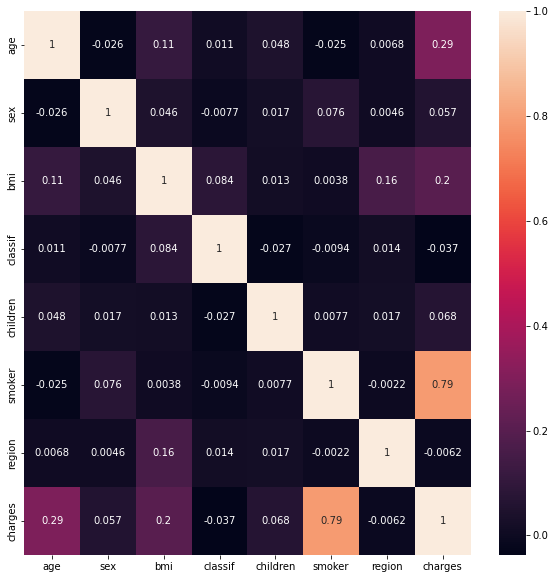

In [17]:
plt.figure(figsize=(10, 10))
sns.heatmap(data=cor,annot=True)
plt.show()

# Best features based on their correlation value
1. smoker have correlation of 0.79
2. age have correlation of 0.27
3. BMI have correlation of 0.2

# Univariate analysis for Numerical variables

In [18]:
d=df.copy()

count    1338.000000
mean       39.123318
std        14.088157
min         0.000000
25%        26.250000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


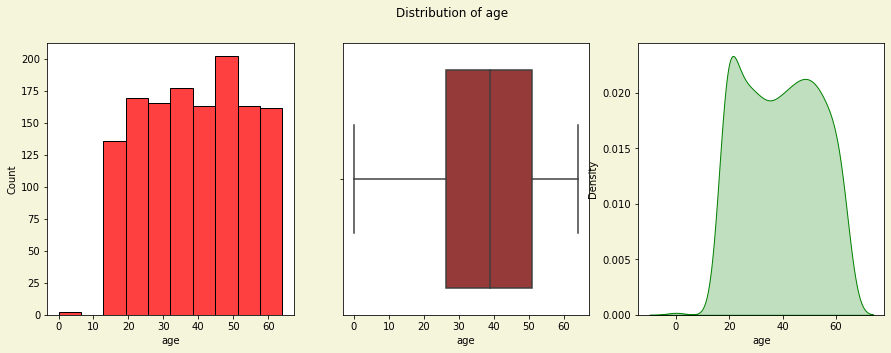

In [143]:
print(d.age.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of age')
plt.subplot(131)
sns.histplot(x = d['age'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['age'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['age'],color='green',shade=True)
plt.show()

# Conclusion:
There are more people at age group of 45-50 while the 50% of people are 26-51 age.

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64


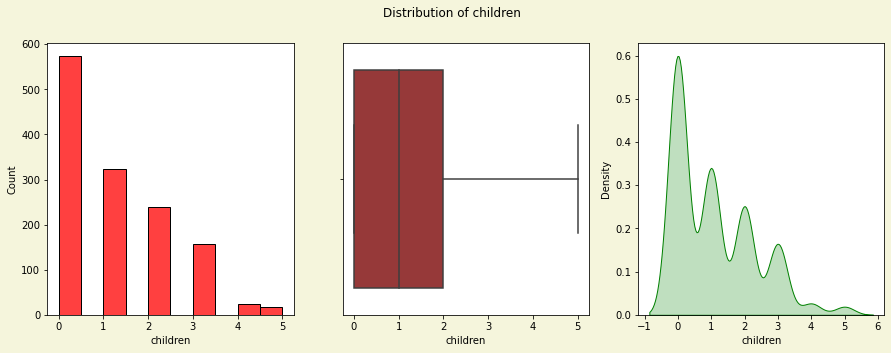

In [144]:
print(d.children.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of children')
plt.subplot(131)
sns.histplot(x = d['children'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['children'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['children'],color='green',shade=True)
plt.show()

# Conclusion :
Most to the clients have zero children and On an avgerage we can say that one children are most common.

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


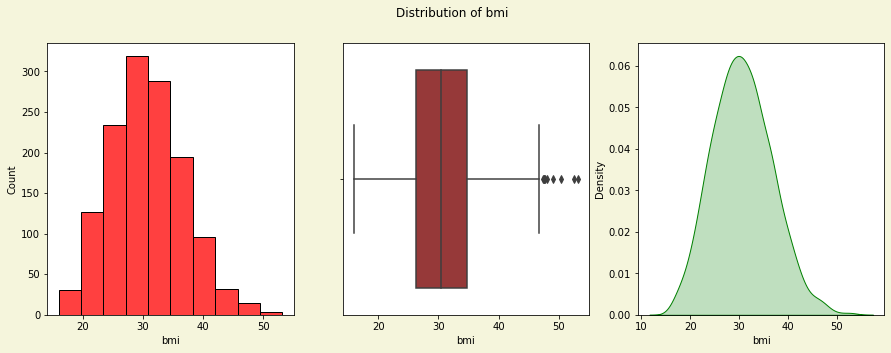

In [145]:
print(d.bmi.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of bmi')
plt.subplot(131)
sns.histplot(x = d['bmi'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['bmi'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['bmi'],color='green',shade=True)
plt.show()

# Conclusion :
# 1.)The mean BMI is 30 while 18.5 to 24.9 is the range of good BMI so with help of this we can decide the charges of insurance.
# 2.)25.0 to 29.9 show that the body is  within the overweight range.
# 3.) BMI is 30.0 or higher, it falls within the obese range.

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


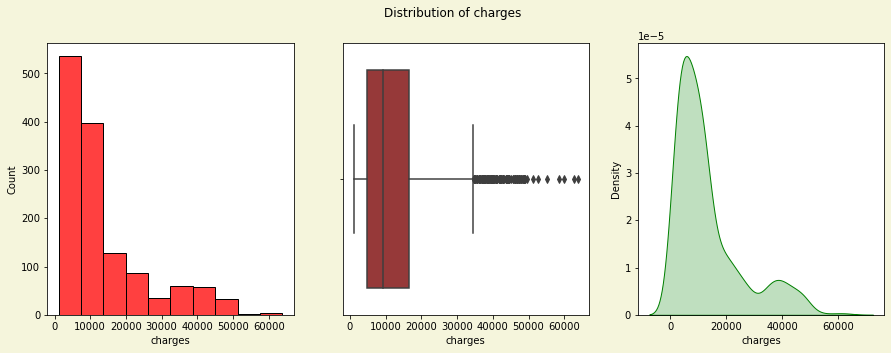

In [146]:
print(d.charges.describe())

plt.figure(figsize=(15,5),facecolor='beige')
plt.suptitle('Distribution of charges')
plt.subplot(131)
sns.histplot(x = d['charges'], color = "red",bins=(10)) 
plt.subplot(132)
sns.boxplot(x = d['charges'], color = "brown") 
plt.subplot(133)
sns.kdeplot(x=d['charges'],color='green',shade=True)
plt.show()

# Conclusion:
#  Most 50% of the charges is between 4700-17000, while mean charges is 13000 & there are outliers after present.



# Univariate Analysis of Categorical Variable

In [23]:
d.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

male      676
female    662
Name: sex, dtype: int64


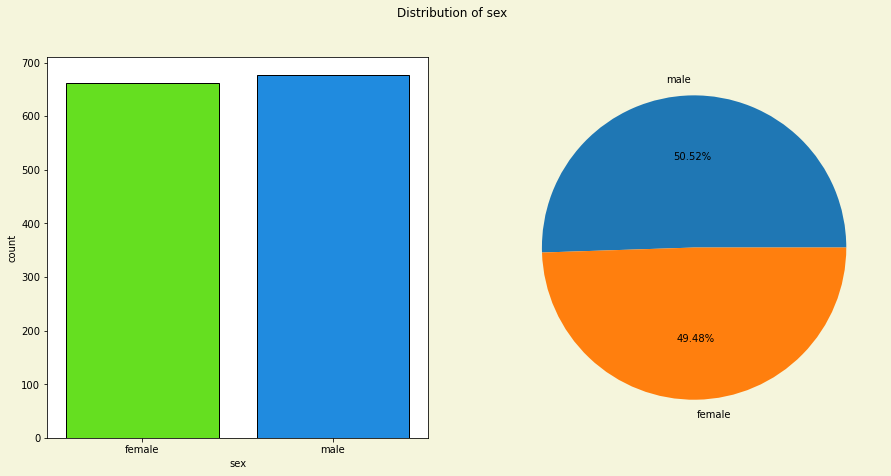

In [148]:
print(d['sex'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of sex')
plt.subplot(121)
sns.countplot(x=d['sex'],ec='black',palette='gist_rainbow')
plt.subplot(122)
perc=d['sex'].value_counts()
lbl=list(d['sex'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


# Conclusion: Male and Female almost in equal in value counts.

OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64


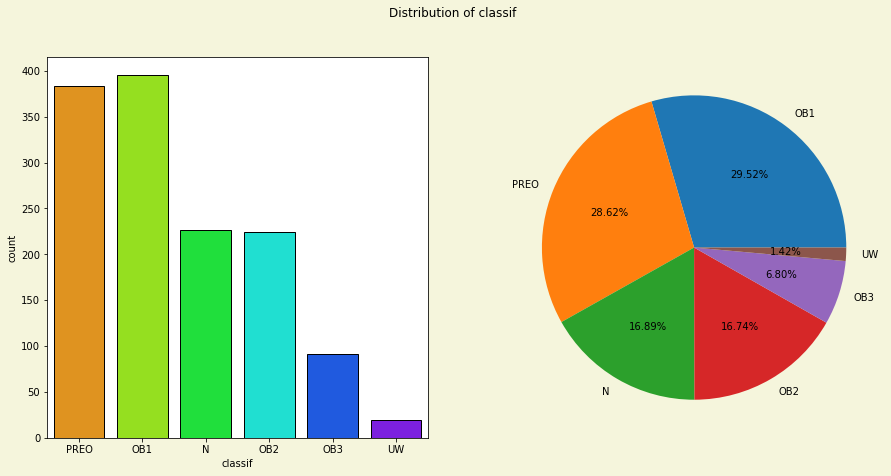

In [151]:
print(d['classif'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of classif')
plt.subplot(121)
sns.countplot(x=d['classif'],ec='black',palette='gist_rainbow')
plt.subplot(122)
perc=d['classif'].value_counts()
lbl=list(d['classif'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


# Conclusion : OB1 insurance type are most taken by Insurance type and UW are least taken insurance type.

no     1064
yes     274
Name: smoker, dtype: int64


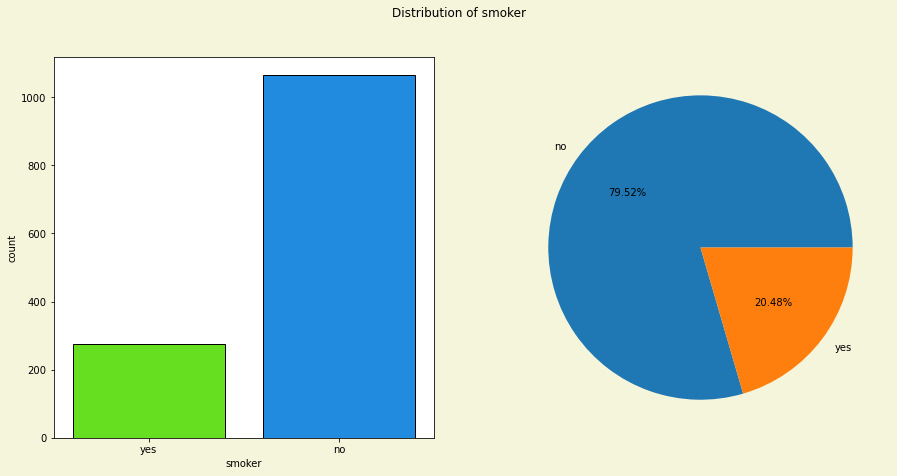

In [149]:
print(d['smoker'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of smoker')
plt.subplot(121)
sns.countplot(x=d['smoker'],ec='black',palette='gist_rainbow')
plt.subplot(122)
perc=d['smoker'].value_counts()
lbl=list(d['smoker'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


# Conclusion: Non smoker people are more compared to smoker who applied for insurance


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


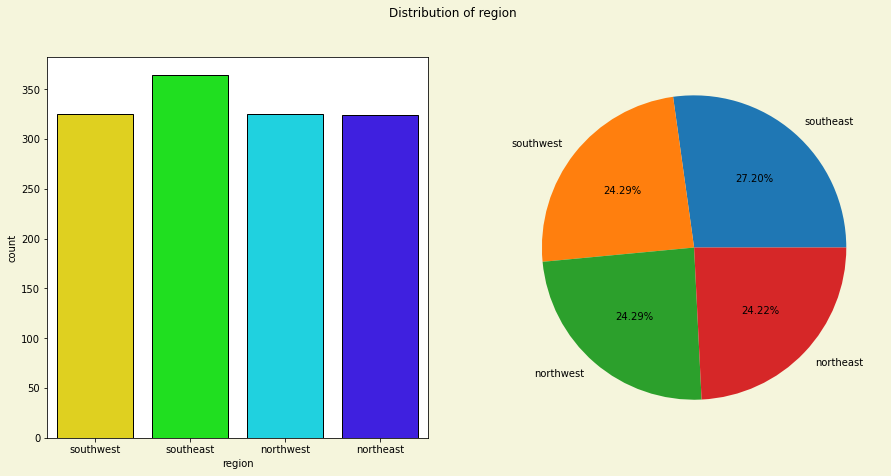

In [150]:
print(d['region'].value_counts())
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Distribution of region')
plt.subplot(121)
sns.countplot(x=d['region'],ec='black',palette='gist_rainbow')
plt.subplot(122)
perc=d['region'].value_counts()
lbl=list(d['region'].value_counts().index)
plt.pie(perc,labels=lbl,autopct='%.2f%%')
plt.show()


# Conclusion: Southeast has the most number of People.

# Bi variate analysis

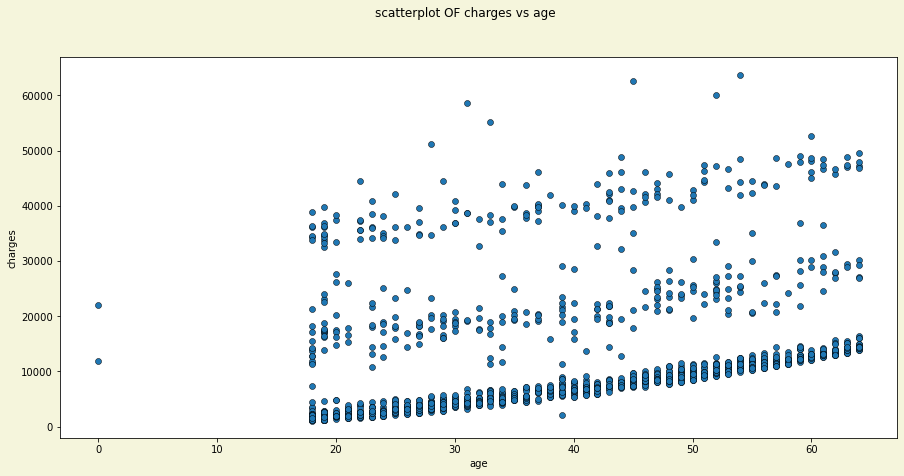

In [94]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('scatterplot OF charges vs age')
sns.scatterplot(data=df,y='charges',x='age',palette='cool',ec='black');

# Conclusion: 
We can see that as age increases charges increases

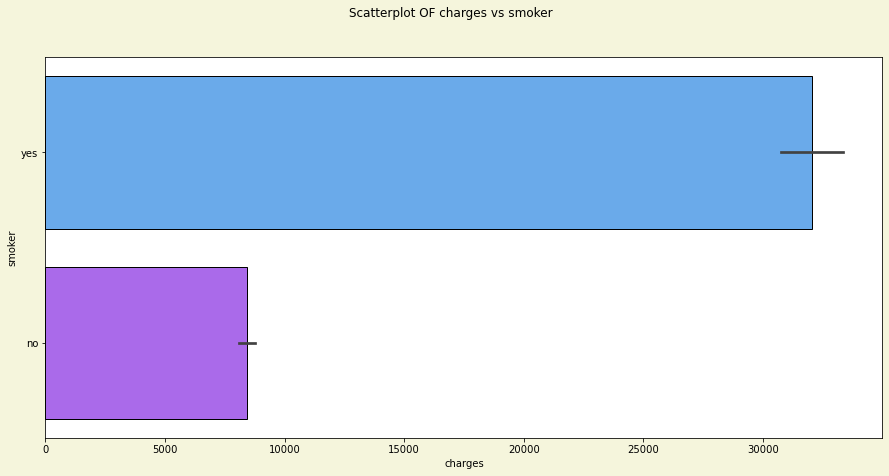

In [153]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF charges vs smoker')
sns.barplot(data=df,x='charges',y='smoker',palette='cool',ec='black');

# Conclusion:
we see that people who smoke have more charges.

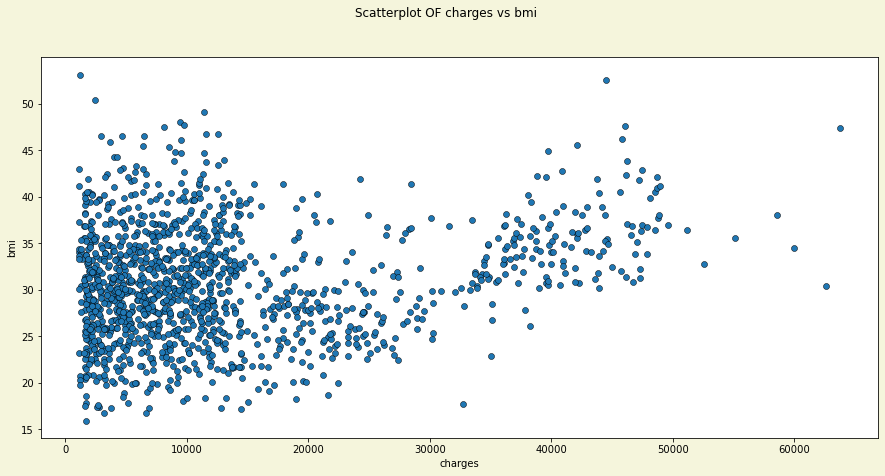

In [154]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF charges vs bmi')
sns.scatterplot(data=df,x='charges',y='bmi',palette='cool',ec='black');

# Conclusion: Charges increases as Bmi increases.

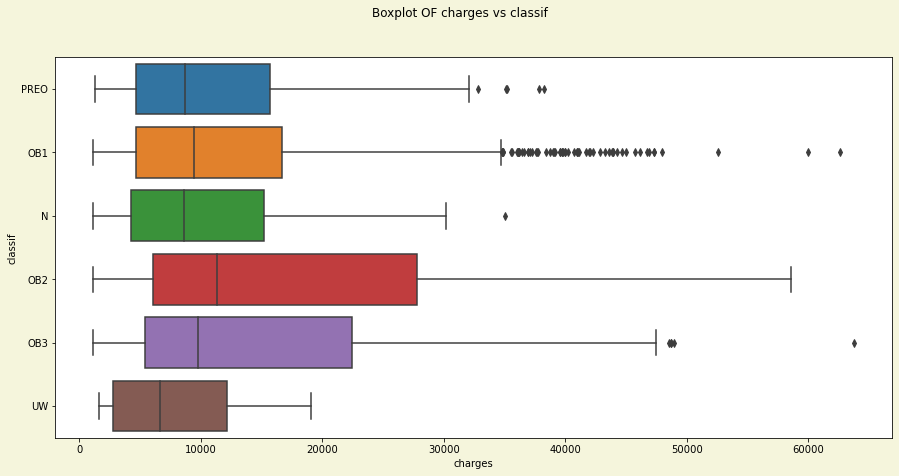

In [155]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Boxplot OF charges vs classif')
sns.boxplot(data=d,x=d['charges'],y=d['classif']);

# Conclusion : OB1 has more Outliers while Ob2 has highest mean charge.

In [32]:
d.dtypes

age           int64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

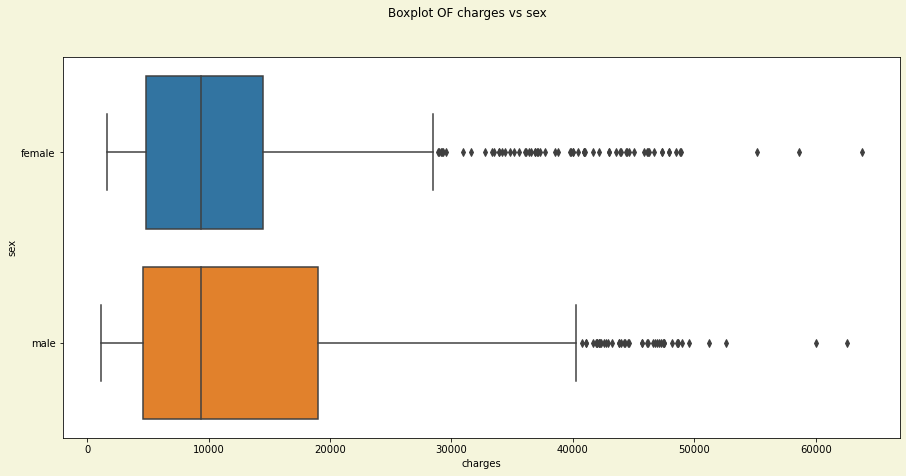

In [156]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Boxplot OF charges vs sex')
sns.boxplot(data=d,x=d['charges'],y=d['sex']);

# Conclusion : Charges for the female have Outliers compared to male.

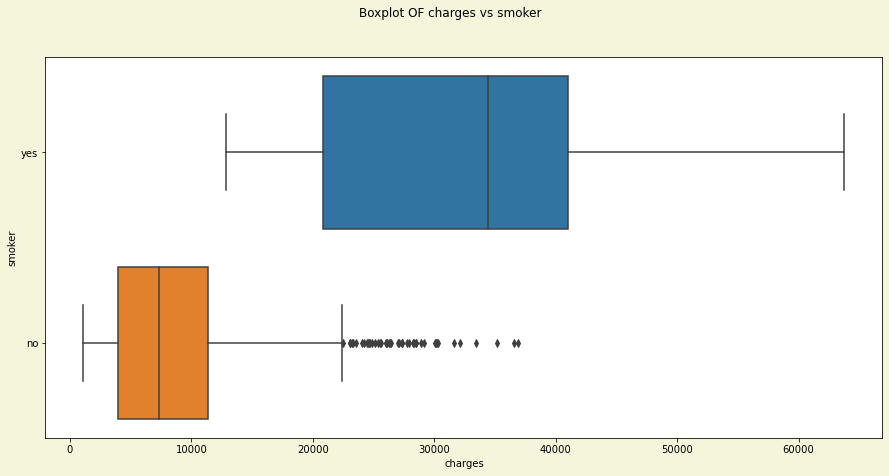

In [157]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Boxplot OF charges vs smoker')
sns.boxplot(data=d,x=d['charges'],y=d['smoker']);

# Conclusion : Charges for smoker is more compared Non-smoker.

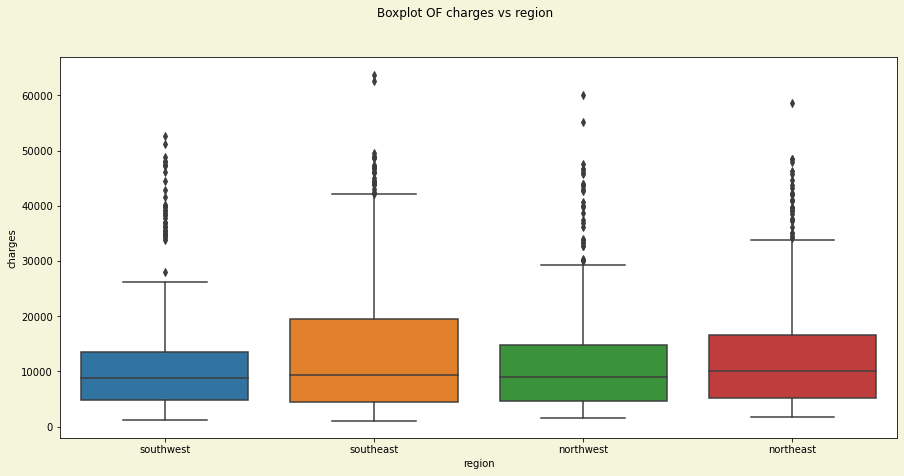

In [158]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Boxplot OF charges vs region')
sns.boxplot(data=d,y=d['charges'],x=d['region']);

# Conclusion :ALL the region have outliers for the charges.

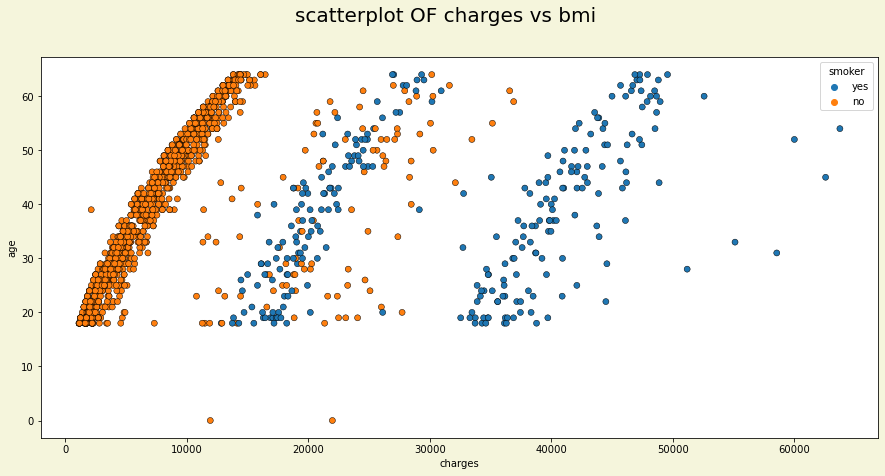

In [87]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('scatterplot OF charges vs bmi',fontsize=(20))
sns.scatterplot(data=df,x='charges',y='age',hue='smoker',ec='black');

# Conclusion: we can see that as age increases charges increases. smoker people have more charges from 10k-40K


<AxesSubplot:xlabel='charges', ylabel='bmi'>

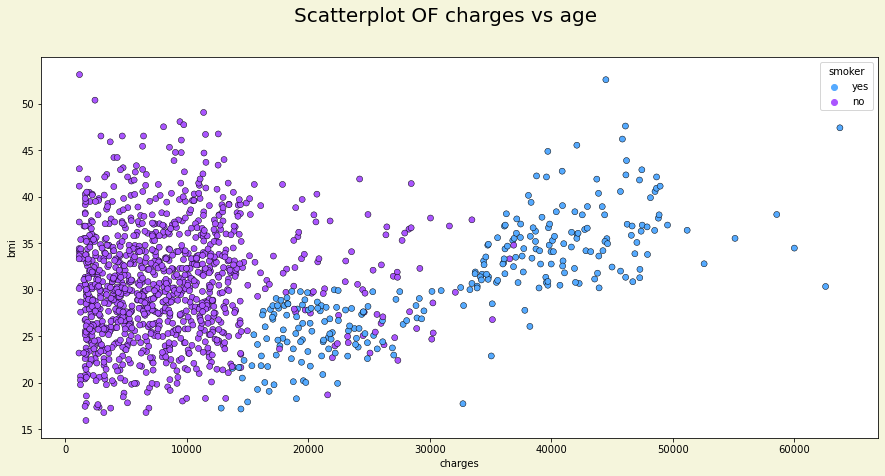

In [159]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF charges vs age',fontsize=(20))
sns.scatterplot(data=df,x='charges',y='bmi',hue='smoker',palette='cool',ec='black')

# Conclusion: we can see that there is lot of difference and formation of cluster for the charges of non-smoker and smoker as bmi increases.

<AxesSubplot:xlabel='bmi', ylabel='charges'>

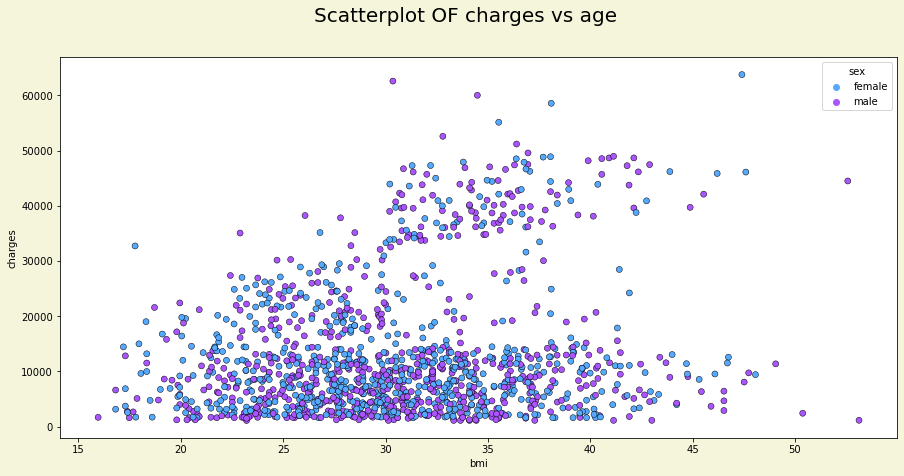

In [162]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF charges vs age',fontsize=(20))
sns.scatterplot(data=df,x='bmi',y='charges',hue='sex',palette='cool',ec='black')

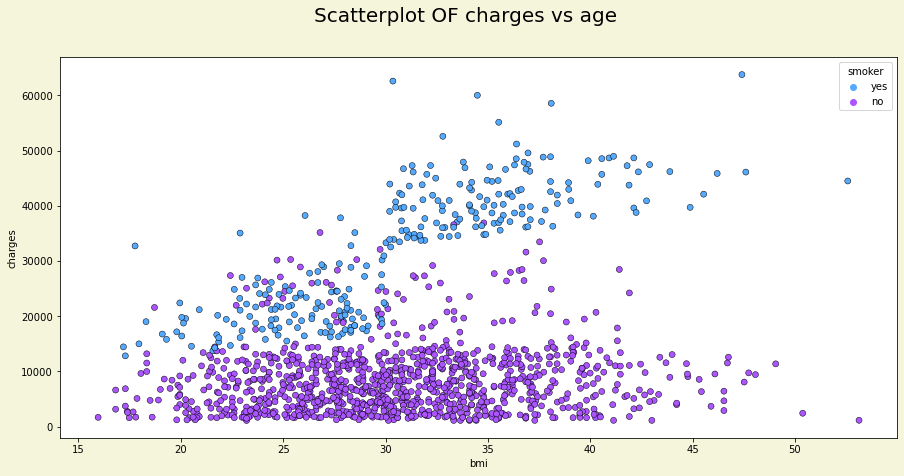

In [163]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF charges vs age',fontsize=(20))
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker',palette='cool',ec='black');

# Conclusion: AS age increases the charges of the smoker increases. while the charges for non smoker as no trend

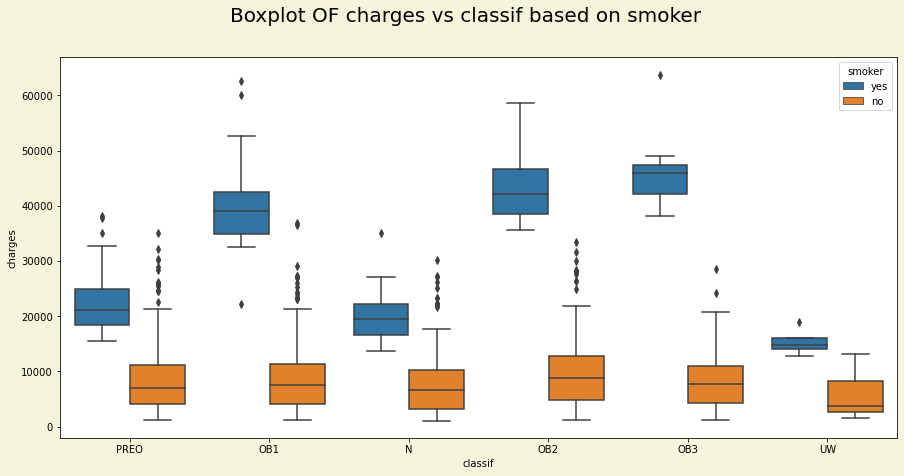

In [164]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Boxplot OF charges vs classif based on smoker',fontsize=(20))
sns.boxplot(data=d,y=d['charges'],x=d['classif'],hue=d['smoker']);

# Conclusion : Insurance type of OB1 ,OB2,OB3 has more charges for smoker people  while there charges for the NON SMOKER is same for all insurance type. 

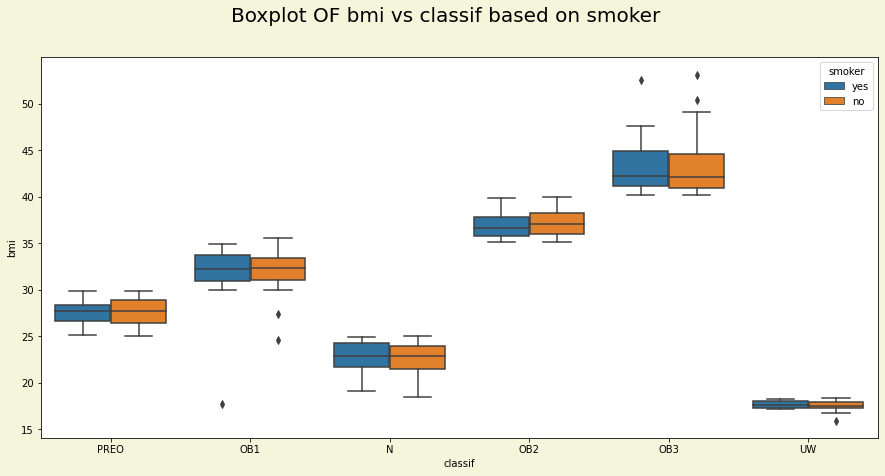

In [165]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Boxplot OF bmi vs classif based on smoker',fontsize=(20))
sns.boxplot(data=d,y=d['bmi'],x=d['classif'],hue=d['smoker']);

# Conculsion:The insurance type ob3 has more BMI compared to other while UW insurance type has the lowest Bmi 

# Model Building

In [42]:
# Linear Regression

In [196]:
x=scaled_df[['age','bmi','smoker']]
y=scaled_df.charges
f=['age','bmi','smoker']

In [1]:
# split the data 70:30
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.3,random_state=30)
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

NameError: name 'train_test_split' is not defined

In [45]:
# training the model
s_model1=LinearRegression().fit(x_train1,y_train1)

In [112]:
coeff_of_det1=round(s_model1.score(x_train1,y_train1),2)

coeff_of_det1

0.74

In [47]:
y_predict1=s_model1.predict(x_test1) # y_actual=y_test


In [194]:
data=pd.DataFrame()
data['y_test']=y_test1
data['y_pred']=y_predict1
data['error']=abs(y_predict1-y_test1)
data

,y_test,y_pred,error
338,0.651208,0.548024,0.103184
620,0.040503,0.080335,0.039832
965,0.057854,0.080210,0.022356
128,0.504598,0.397558,0.107040
329,0.128059,0.201563,0.073504
...,...,...,...
659,0.211857,0.183261,0.028596
893,0.687658,0.568513,0.119145
584,0.001930,-0.020755,0.022685
1290,0.095964,0.057156,0.038808


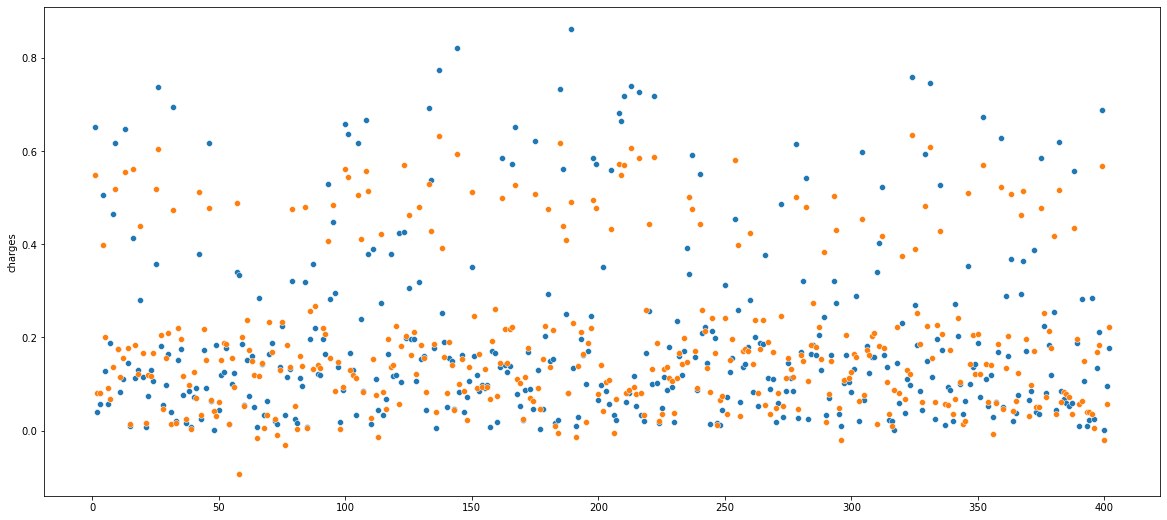

In [48]:
plt.figure(figsize=(20,9))
k=np.arange(1,len(y_test1)+1)
sns.scatterplot(x=k,y=y_test1)
sns.scatterplot(x=k,y=y_predict1);

In [120]:
MSE1=mean_absolute_error(y_test1,y_predict1)
MAE1=mean_squared_error(y_test1,y_predict1)
RMSE1=mean_squared_error(y_test1,y_predict1,squared=False)
print('MSE =',round(MSE1,3))
print('RMSE =',round(RMSE1,3))
print('MAE =',round(MAE1,3))
                        

MSE = 0.066
RMSE = 0.096
MAE = 0.009


In [121]:
#Linear Regression with one feature
x=scaled_df['age'].values.reshape(-1, 1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det11 = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',round(coeff_of_det11,2),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))


R^2: 0.09 MSE: 0.03 MAE: 0.14 RMSE: 0.18


In [122]:
x=scaled_df['smoker'].values.reshape(-1, 1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det22 = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',round(coeff_of_det22,2),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))


R^2: 0.63 MSE: 0.01 MAE: 0.09 RMSE: 0.12


In [125]:
x=scaled_df['bmi'].values.reshape(-1, 1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det33 = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',round(coeff_of_det33,2),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))


R^2: 0.04 MSE: 0.03 MAE: 0.14 RMSE: 0.19


In [128]:
x=scaled_df['children'].values.reshape(-1, 1)
y=scaled_df['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
model = LinearRegression().fit(x_train,y_train)   #training
coeff_of_det44 = model.score(x_train,y_train)  #R^2
y_predict = model.predict(x_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE  = mean_squared_error(y_test,y_predict,squared=False)
print('R^2:',round(coeff_of_det44,4),'MSE:',round(MSE,2),'MAE:',round(MAE,2),'RMSE:',round(RMSE,2))


R^2: 0.0011 MSE: 0.04 MAE: 0.14 RMSE: 0.19


In [129]:
x=scaled_df[['age','bmi','smoker']]
y=scaled_df.charges

# Decision Tree Regressor

In [181]:
dtm = DecisionTreeRegressor()
s_model2 = dtm.fit(x_train1, y_train1)
y_predict2 = s_model2.predict(x_test1)


In [182]:
round(s_model2.score(x_train1,y_train1),2)

0.99

In [183]:
round(s_model2.score(x_test1,y_test1),2)

0.65

In [193]:
data1=pd.DataFrame()
data1['y_test']=y_test1
data1['y_pred']=y_predict2
data1['error']=abs(y_predict2-y_test1)
data1

,y_test,y_pred,error
338,0.651208,0.638088,0.013120
620,0.040503,0.047162,0.006659
965,0.057854,0.057865,0.000011
128,0.504598,0.247984,0.256614
329,0.128059,0.404562,0.276503
...,...,...,...
659,0.211857,0.157124,0.054733
893,0.687658,0.668197,0.019461
584,0.001930,0.026845,0.024915
1290,0.095964,0.075565,0.020400


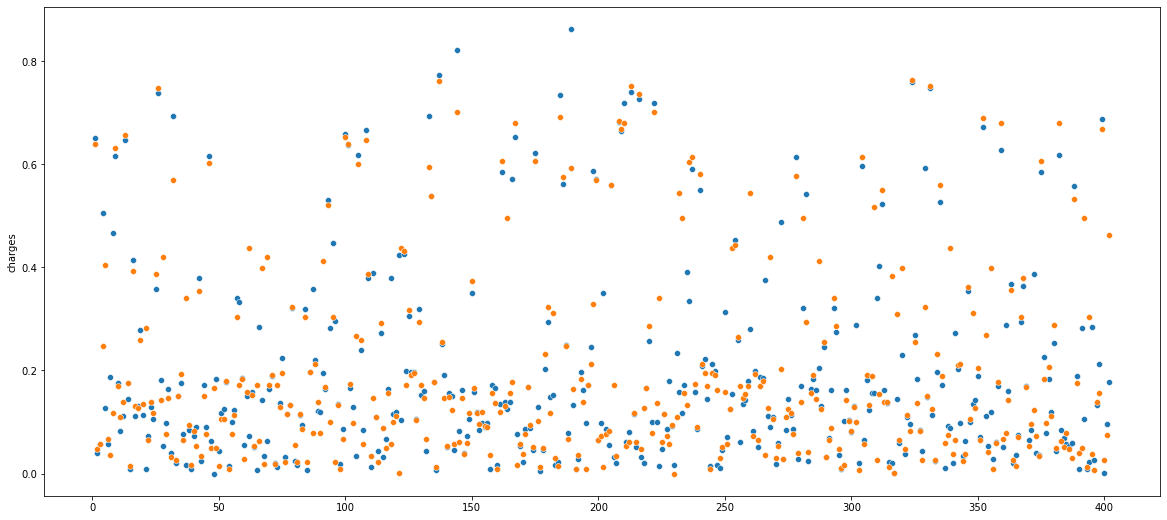

In [195]:
plt.figure(figsize=(20,9))
k=np.arange(1,len(y_test1)+1)
sns.scatterplot(x=k,y=y_test1)
sns.scatterplot(x=k,y=y_predict2);

# Tuning the Depth of a Tree

In [186]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=4, shuffle=False, random_state=None)
for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 1), x, y, cv= kf,scoring="r2") # split=3
    print(f'For max depth: {val}')
    #rmse(score.mean())
    print('r2 score :',round(score.mean(),3))

For max depth: 1
r2 score : 0.616
For max depth: 2
r2 score : 0.819
For max depth: 3
r2 score : 0.841
For max depth: 4
r2 score : 0.848
For max depth: 5
r2 score : 0.833
For max depth: 6
r2 score : 0.825
For max depth: 7
r2 score : 0.805
For max depth: 8
r2 score : 0.797
For max depth: 9
r2 score : 0.785
For max depth: 10
r2 score : 0.769
For max depth: 11
r2 score : 0.747
For max depth: 12
r2 score : 0.734
For max depth: 13
r2 score : 0.722
For max depth: 14
r2 score : 0.72
For max depth: 15
r2 score : 0.718


We can see that at Mx depth 4 we have best R2 score so we will consider it.

In [200]:
dtm = DecisionTreeRegressor(max_depth=4)
s_model22 = dtm.fit(x_train1, y_train1)
y_predict22 = s_model2.predict(x_test1)
round(s_model22.score(x_train1,y_train1),2)

0.87

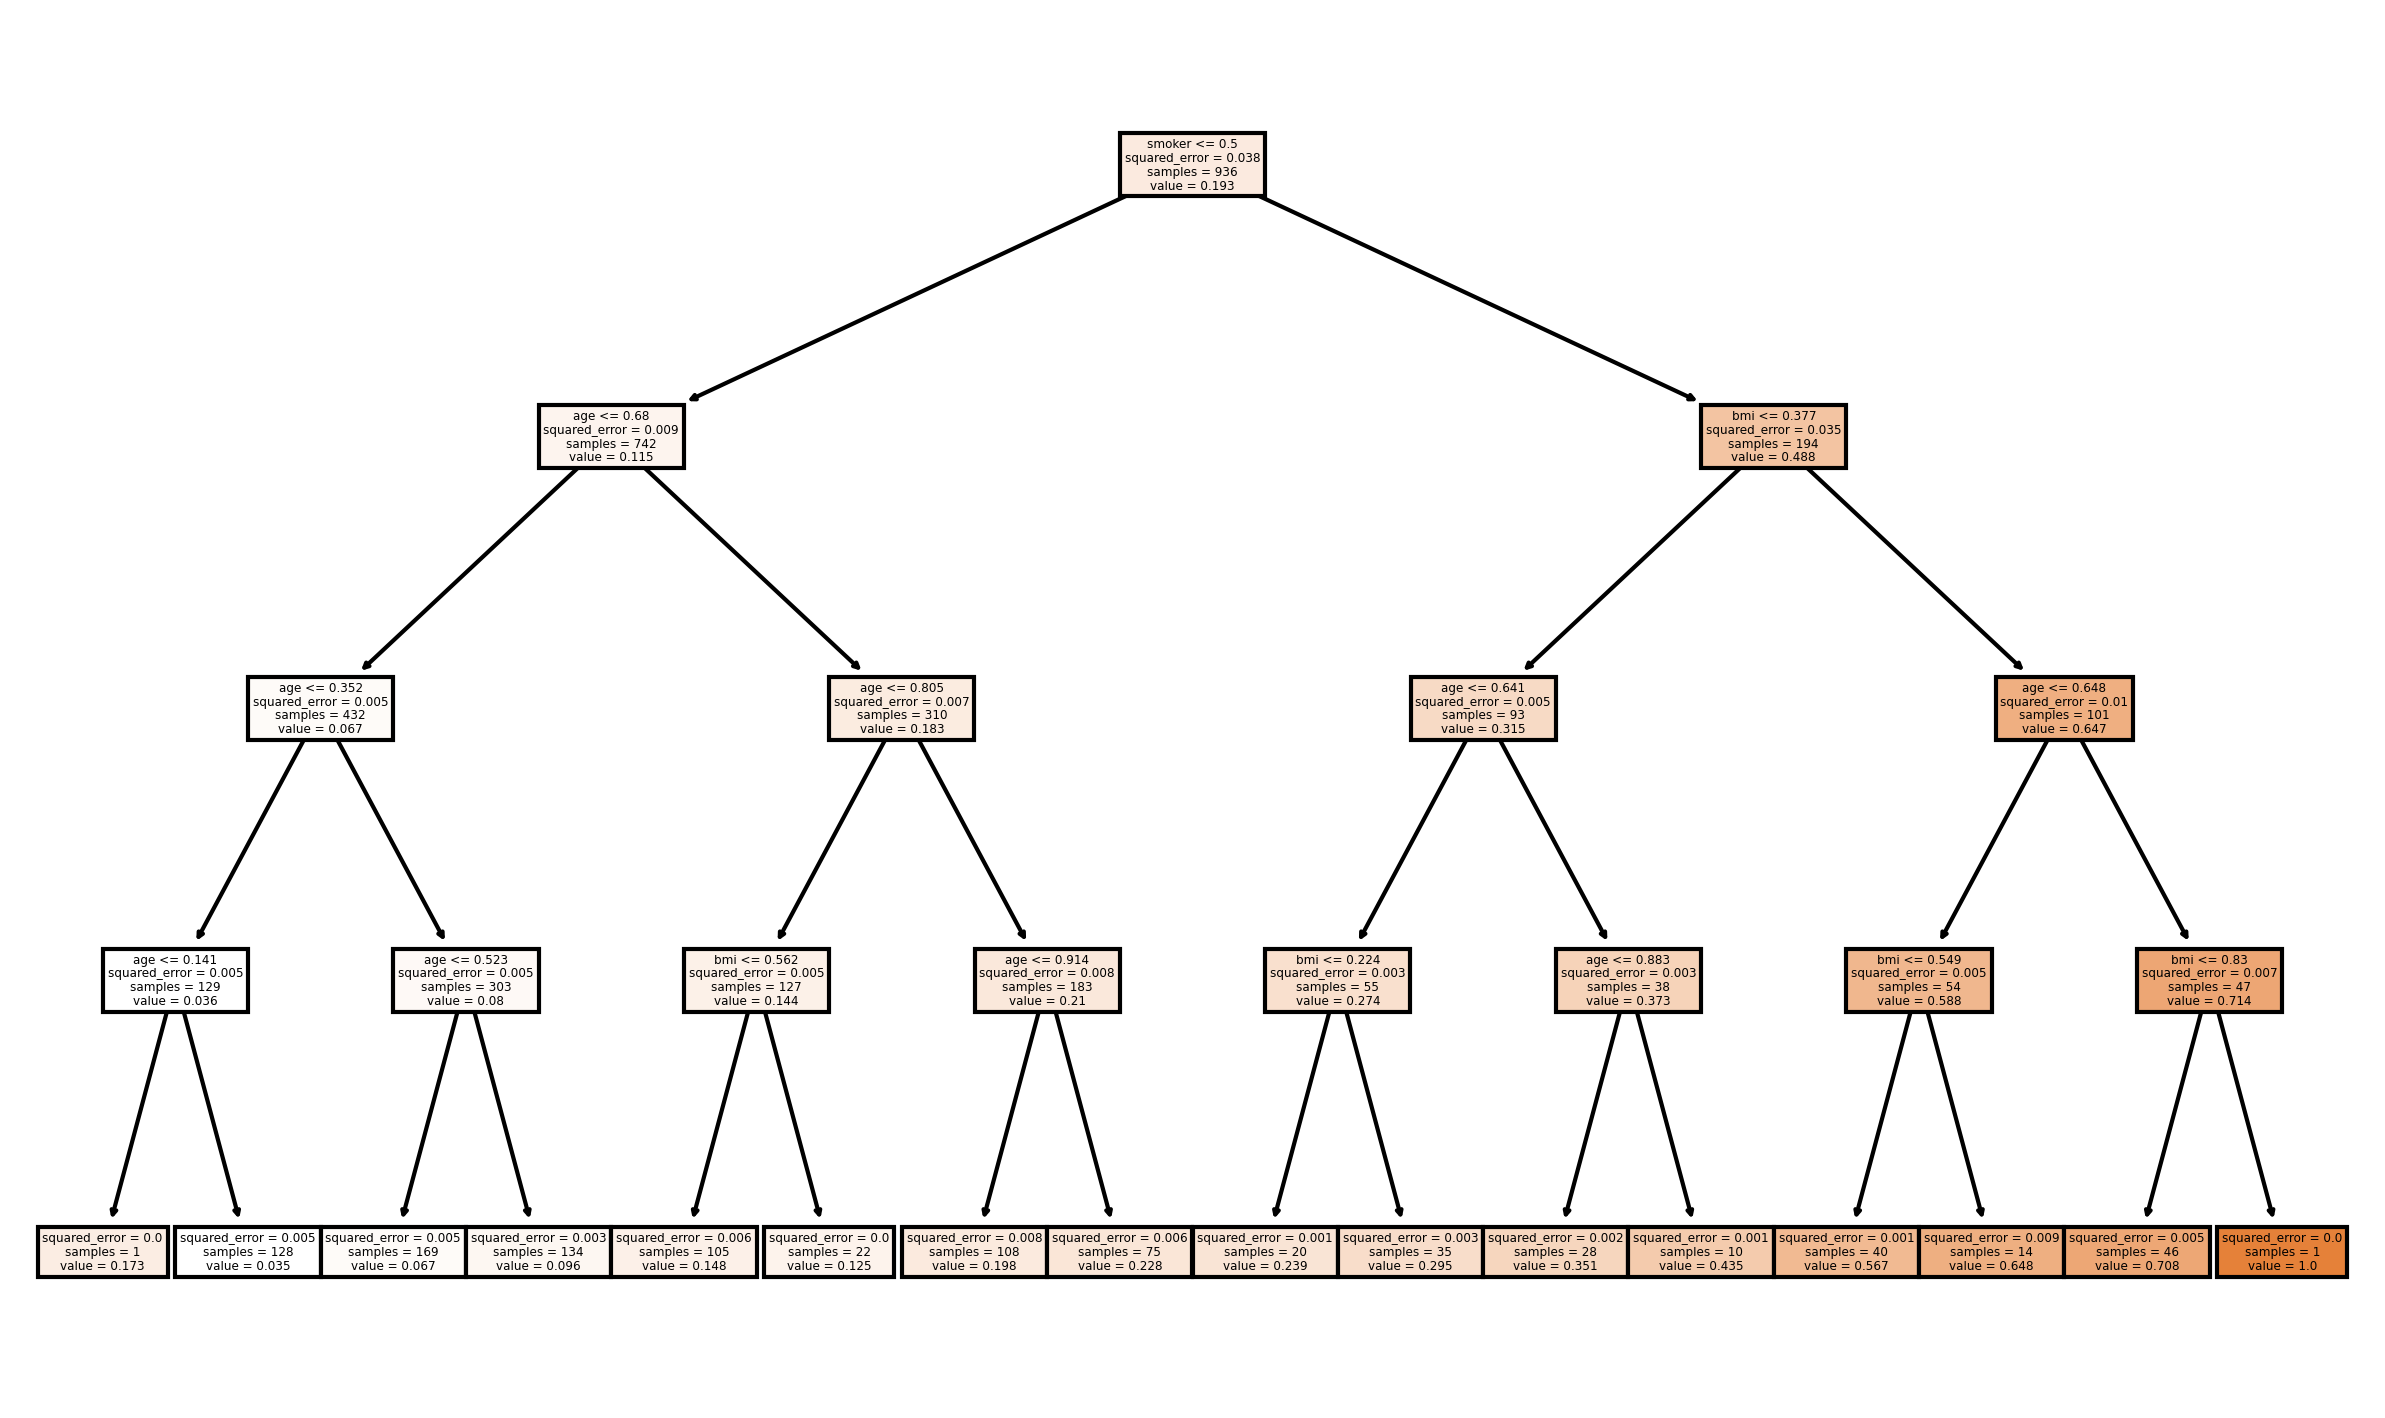

In [201]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,6),dpi=300)
tree.plot_tree(s_model22,feature_names=f,filled=True)
plt.show()

In [192]:
data2=pd.DataFrame()
data2['y_test']=y_test1
data2['y_pred']=y_predict22
data2['error']=abs(y_predict22-y_test1)
data2


,y_test,y_pred,error
338,0.651208,0.638088,0.013120
620,0.040503,0.047162,0.006659
965,0.057854,0.057865,0.000011
128,0.504598,0.247984,0.256614
329,0.128059,0.404562,0.276503
...,...,...,...
659,0.211857,0.157124,0.054733
893,0.687658,0.668197,0.019461
584,0.001930,0.026845,0.024915
1290,0.095964,0.075565,0.020400


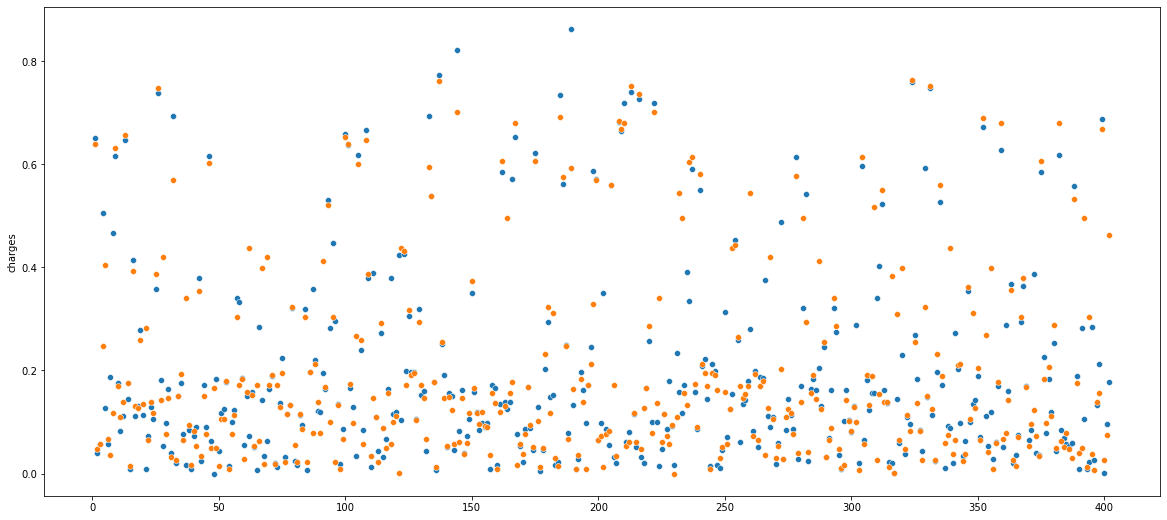

In [188]:
plt.figure(figsize=(20,9))
k=np.arange(1,len(y_test1)+1)
sns.scatterplot(x=k,y=y_test1)
sns.scatterplot(x=k,y=y_predict22);

# Random Forest Regressor

In [62]:
regressor = RandomForestRegressor(oob_score=True) 
s_model3 = regressor.fit(x_train1, y_train1)
y_predict3 = s_model3.predict(x_test1)

In [137]:
round(s_model3.score(x_train1,y_train1),2)

0.97

In [139]:
round(s_model3.oob_score_,2)

0.82

In [140]:
round(s_model3.score(x_test1,y_test1),2)

0.78

In [190]:
data4=pd.DataFrame()
data4['y_test']=y_test1
data4['y_pred']=y_predict3
data4['error']=abs(y_predict3-y_test1)
data4

,y_test,y_pred,error
338,0.651208,0.646302,0.004906
620,0.040503,0.053324,0.012821
965,0.057854,0.091594,0.033740
128,0.504598,0.241755,0.262843
329,0.128059,0.344535,0.216476
...,...,...,...
659,0.211857,0.169176,0.042680
893,0.687658,0.699460,0.011802
584,0.001930,0.020455,0.018524
1290,0.095964,0.079952,0.016013


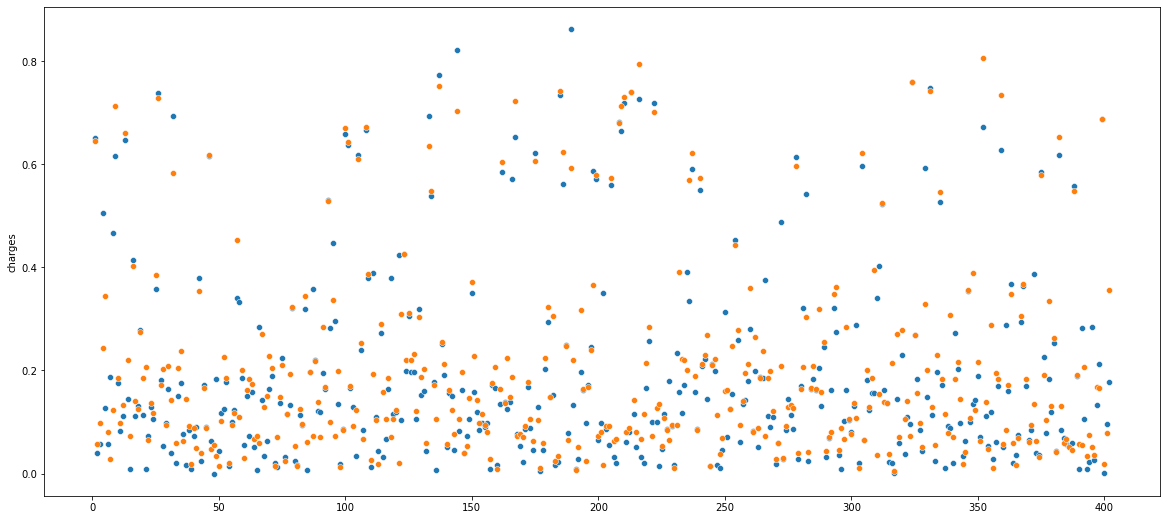

In [66]:
plt.figure(figsize=(20,9))
k=np.arange(1,len(y_test1)+1)
sns.scatterplot(x=k,y=y_test1)
sns.scatterplot(x=k,y=y_predict3);

# Hyperparameter tuning for Random Forest using GridSearchCV

In [67]:
# defining model
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
# defining model parameters
params_rf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10,25,30,50,100,200]}
# defining grid search model
grid_search = GridSearchCV(estimator=rf,param_grid=params_rf,cv = 4,n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x_train1, y_train1)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [68]:
# best parameters for the model
grid_search.best_estimator_

RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,
                      n_jobs=-1, random_state=42)

In [141]:
regressor = RandomForestRegressor(max_depth=2, min_samples_leaf=5, n_estimators=10,n_jobs=-1, random_state=42) 
s_model33 = regressor.fit(x_train1, y_train1)
y_predict33 = s_model33.predict(x_test1)
round(s_model33.score(x_train1,y_train1),2)

0.83

In [191]:
data5=pd.DataFrame()
data5['y_test']=y_test1
data5['y_pred']=y_predict33
data5['error']=abs(y_predict33-y_test1)
data5

,y_test,y_pred,error
338,0.651208,0.643170,0.008038
620,0.040503,0.068123,0.027620
965,0.057854,0.068123,0.010269
128,0.504598,0.315049,0.189549
329,0.128059,0.188740,0.060681
...,...,...,...
659,0.211857,0.188740,0.023117
893,0.687658,0.643170,0.044488
584,0.001930,0.068123,0.066193
1290,0.095964,0.068123,0.027841


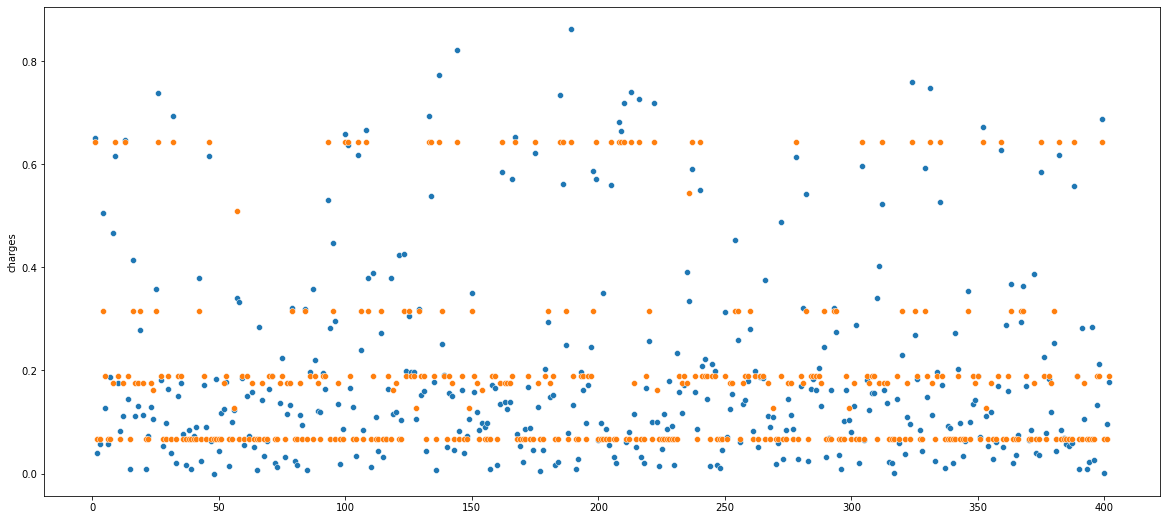

In [70]:
plt.figure(figsize=(20,9))
k=np.arange(1,len(y_test1)+1)
sns.scatterplot(x=k,y=y_test1)
sns.scatterplot(x=k,y=y_predict33);

In [142]:
data=pd.DataFrame()
data['Model     ']=['Model Type','score Value']
data["Model    1"]=['Linear Regression with all features',round(coeff_of_det1,2)]
data["Model    2"]=['Linear Regression with age & charges',round(coeff_of_det11,2)]
data["Model    3"]=['Linear Regression with sex & charges',round(coeff_of_det22,2)]
data["Model    4"]=['Linear Regression with bmi & charges',round(coeff_of_det33,2)]
data["Model    5"]=['Linear Regression with children & charges',0.00107]
data['Model    6']=["Decision Tree Regressor",0.99]
data['Model    7']=["Decision Tree Regressor (tuning)",0.87]
data['Model    8']=["Random Forest Regressor",0.975]
data['Model    9']=["Random Forest Regressor (tuning)",0.83]
data

,Model,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7,Model 8,Model 9
0,Model Type,Linear Regression with all features,Linear Regression with age & charges,Linear Regression with sex & charges,Linear Regression with bmi & charges,Linear Regression with children & charges,Decision Tree Regressor,Decision Tree Regressor (tuning),Random Forest Regressor,Random Forest Regressor (tuning)
1,score Value,0.74,0.09,0.63,0.04,0.00107,0.99,0.87,0.975,0.83


# We can see that Decision Tree Regressor (tuning)  has more score so we can consider it as best model.

# OVER ALL CONCLUSION 
1.The clients with with above 25 BMI can be charged more.

2.We sholud also focus on the clients with best BMI because they might be the most profitable clients (As they are fit there is less chance so getting ill.)
